<a href="https://colab.research.google.com/github/Mohan311094/Assignments/blob/main/Assignment_11_(2)_amazon_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
## Perform sentimental analysis:
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

#Multi-page web-scraping</a>
In this, I’m going to show you how to build a multi-page web-scraper in Python.

We will be scraping Amazon product reviews data, but the focus will be on looping through multiple pages.

If you’re looking for a basic introduction to web-scraping in Python, check out the single page Python web-scraper for Amazon product reviews data.

Scraped Amazon product reviews data for some Oneplus Flagship Smartphone
Introduction to using Splash and Docker for web-scraping
Step-by-step implementation of popular web-scraping Python libraries: BeautifulSoup, requests, and Splash.

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

#Looping through multiple pages</a>
One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

Try for yourself! See how the URL changes as you go through multiple pages.

For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.

#### Okay, now let’s put this to work in a function:

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

#### We can even add in a a stop condition. For this one, we can tell Python to look for a greyed out “Next Page” button. To identify this element, use the element inspector.

Add this to the bottom of the function above.

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-6-2e47bb25bda7>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nPhones magic,This is best phone in low budget this type of ...,6 August 2023
1,4.0,4.0 out of 5 stars\nMy review,"After using of 6 months, my observation is bat...",6 August 2023
2,4.0,4.0 out of 5 stars\nBetter in respect of price...,It has fine features in respect of money. A bi...,7 August 2023
3,4.0,4.0 out of 5 stars\nGood 5g phone in this segment,Camera is avgPerformance is goodBattery goodIn...,6 August 2023
4,4.0,4.0 out of 5 stars\nA mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
...,...,...,...,...
95,5.0,5.0 out of 5 stars\nVery nice,Superb quality phone with good display and nic...,29 July 2023
96,4.0,4.0 out of 5 stars\nIt's amazing,All products is very good,21 July 2023
97,4.0,4.0 out of 5 stars\nNothing,Nothing,27 July 2023
98,4.0,4.0 out of 5 stars\nWork perfectly,The phone is very good and its function really...,22 July 2023


In [8]:
df.to_csv("/amazon_review.csv")


#Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [10]:
# load the dataset
reviews=pd.read_csv('/amazon_review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nPhones magic,This is best phone in low budget this type of ...,6 August 2023
1,4.0,4.0 out of 5 stars\nMy review,"After using of 6 months, my observation is bat...",6 August 2023
2,4.0,4.0 out of 5 stars\nBetter in respect of price...,It has fine features in respect of money. A bi...,7 August 2023
3,4.0,4.0 out of 5 stars\nGood 5g phone in this segment,Camera is avgPerformance is goodBattery goodIn...,6 August 2023
4,4.0,4.0 out of 5 stars\nA mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
...,...,...,...,...
95,5.0,5.0 out of 5 stars\nVery nice,Superb quality phone with good display and nic...,29 July 2023
96,4.0,4.0 out of 5 stars\nIt's amazing,All products is very good,21 July 2023
97,4.0,4.0 out of 5 stars\nNothing,Nothing,27 July 2023
98,4.0,4.0 out of 5 stars\nWork perfectly,The phone is very good and its function really...,22 July 2023


#Data Exploration

In [11]:
reviews.Rating.describe()

count    100.000000
mean       4.040000
std        0.196946
min        4.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

#### Number of Words

In [12]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,This is best phone in low budget this type of ...,36
1,"After using of 6 months, my observation is bat...",34
2,It has fine features in respect of money. A bi...,23
3,Camera is avgPerformance is goodBattery goodIn...,8
4,I will try to keep this review short. This rev...,216


#### Number of characters

In [13]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,This is best phone in low budget this type of ...,182.0
1,"After using of 6 months, my observation is bat...",169.0
2,It has fine features in respect of money. A bi...,121.0
3,Camera is avgPerformance is goodBattery goodIn...,64.0
4,I will try to keep this review short. This rev...,1189.0


#### Average Word Length

In [14]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,This is best phone in low budget this type of ...,4.083333
1,"After using of 6 months, my observation is bat...",4.000000
2,It has fine features in respect of money. A bi...,4.304348
3,Camera is avgPerformance is goodBattery goodIn...,7.125000
4,I will try to keep this review short. This rev...,4.509259


#### Number of stopwords

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,This is best phone in low budget this type of ...,12
1,"After using of 6 months, my observation is bat...",14
2,It has fine features in respect of money. A bi...,5
3,Camera is avgPerformance is goodBattery goodIn...,3
4,I will try to keep this review short. This rev...,94


#### Number of special characters

In [16]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,This is best phone in low budget this type of ...,0
1,"After using of 6 months, my observation is bat...",0
2,It has fine features in respect of money. A bi...,0
3,Camera is avgPerformance is goodBattery goodIn...,0
4,I will try to keep this review short. This rev...,0


#### Number of numerics

In [17]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,This is best phone in low budget this type of ...,0
1,"After using of 6 months, my observation is bat...",2
2,It has fine features in respect of money. A bi...,1
3,Camera is avgPerformance is goodBattery goodIn...,0
4,I will try to keep this review short. This rev...,0


#### Number of Uppercase words

In [18]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,This is best phone in low budget this type of ...,1
1,"After using of 6 months, my observation is bat...",2
2,It has fine features in respect of money. A bi...,3
3,Camera is avgPerformance is goodBattery goodIn...,0
4,I will try to keep this review short. This rev...,3


####  Spelling correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [19]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    His is best phone in low budget this type of p...
1    After using of 6 months, my observation is bat...
2    It has fine features in respect of money. A bi...
3    Camera is avgPerformance is goodBattery goodIn...
4    I will try to keep this review short. His revi...
Name: Review, dtype: object

#### As you can see spelling mistake did a mistake of correcting the word Hang into Sang in Context to this review the word 'Hang' fits here and not 'Sang'

#Feature Engineering

In [20]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0      6
1      6
2      7
3      6
4     12
      ..
95    29
96    21
97    27
98    22
99     6
Name: Review_Date, Length: 100, dtype: object 
 0      August
1      August
2      August
3      August
4     January
       ...   
95       July
96       July
97       July
98       July
99       July
Name: Review_Date, Length: 100, dtype: object 
 0     2023
1     2023
2     2023
3     2023
4     2023
      ... 
95    2023
96    2023
97    2023
98    2023
99    2023
Name: Review_Date, Length: 100, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [21]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,6,August,2023
1,6,August,2023
2,7,August,2023
3,6,August,2023
4,12,January,2023
...,...,...,...
95,29,July,2023
96,21,July,2023
97,27,July,2023
98,22,July,2023


In [22]:
df.Month.value_counts()

July        77
August      21
January      1
December     1
Name: Month, dtype: int64

### Change 'month' from words to numbers for easier analysis

In [23]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,August
1,August
2,August
3,August
4,January
...,...
95,July
96,July
97,July
98,July


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   word_count   100 non-null    int64  
 5   char_count   99 non-null     float64
 6   avg_word     100 non-null    float64
 7   stopwords    100 non-null    int64  
 8   hashtags     100 non-null    int64  
 9   numerics     100 non-null    int64  
 10  upper        100 non-null    int64  
 11  Date         100 non-null    object 
 12  Month        100 non-null    object 
 13  Year         100 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 11.1+ KB


In [25]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   word_count   100 non-null    int64  
 5   char_count   99 non-null     float64
 6   avg_word     100 non-null    float64
 7   stopwords    100 non-null    int64  
 8   hashtags     100 non-null    int64  
 9   numerics     100 non-null    int64  
 10  upper        100 non-null    int64  
 11  Date         100 non-null    int64  
 12  Month        100 non-null    object 
 13  Year         100 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 11.1+ KB


### Dropping the Original Columns after splitting the data

In [26]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,4.0,4.0 out of 5 stars\nPhones magic,This is best phone in low budget this type of ...,36,182.0,4.083333,12,0,0,1,6,August,2023
1,4.0,4.0 out of 5 stars\nMy review,"After using of 6 months, my observation is bat...",34,169.0,4.000000,14,0,2,2,6,August,2023
2,4.0,4.0 out of 5 stars\nBetter in respect of price...,It has fine features in respect of money. A bi...,23,121.0,4.304348,5,0,1,3,7,August,2023
3,4.0,4.0 out of 5 stars\nGood 5g phone in this segment,Camera is avgPerformance is goodBattery goodIn...,8,64.0,7.125000,3,0,0,0,6,August,2023
4,4.0,4.0 out of 5 stars\nA mildly perfect phone,I will try to keep this review short. This rev...,216,1189.0,4.509259,94,0,0,3,12,January,2023


In [27]:
df

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,4.0,4.0 out of 5 stars\nPhones magic,This is best phone in low budget this type of ...,6 August 2023,36,182.0,4.083333,12,0,0,1,6,August,2023
1,4.0,4.0 out of 5 stars\nMy review,"After using of 6 months, my observation is bat...",6 August 2023,34,169.0,4.000000,14,0,2,2,6,August,2023
2,4.0,4.0 out of 5 stars\nBetter in respect of price...,It has fine features in respect of money. A bi...,7 August 2023,23,121.0,4.304348,5,0,1,3,7,August,2023
3,4.0,4.0 out of 5 stars\nGood 5g phone in this segment,Camera is avgPerformance is goodBattery goodIn...,6 August 2023,8,64.0,7.125000,3,0,0,0,6,August,2023
4,4.0,4.0 out of 5 stars\nA mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023,216,1189.0,4.509259,94,0,0,3,12,January,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,5.0 out of 5 stars\nVery nice,Superb quality phone with good display and nic...,29 July 2023,93,492.0,4.301075,36,0,1,4,29,July,2023
96,4.0,4.0 out of 5 stars\nIt's amazing,All products is very good,21 July 2023,5,25.0,4.200000,2,0,0,0,21,July,2023
97,4.0,4.0 out of 5 stars\nNothing,Nothing,27 July 2023,1,7.0,7.000000,0,0,0,0,27,July,2023
98,4.0,4.0 out of 5 stars\nWork perfectly,The phone is very good and its function really...,22 July 2023,13,66.0,4.153846,6,0,0,0,22,July,2023


#Data Visualization</a>

#### date versus review count

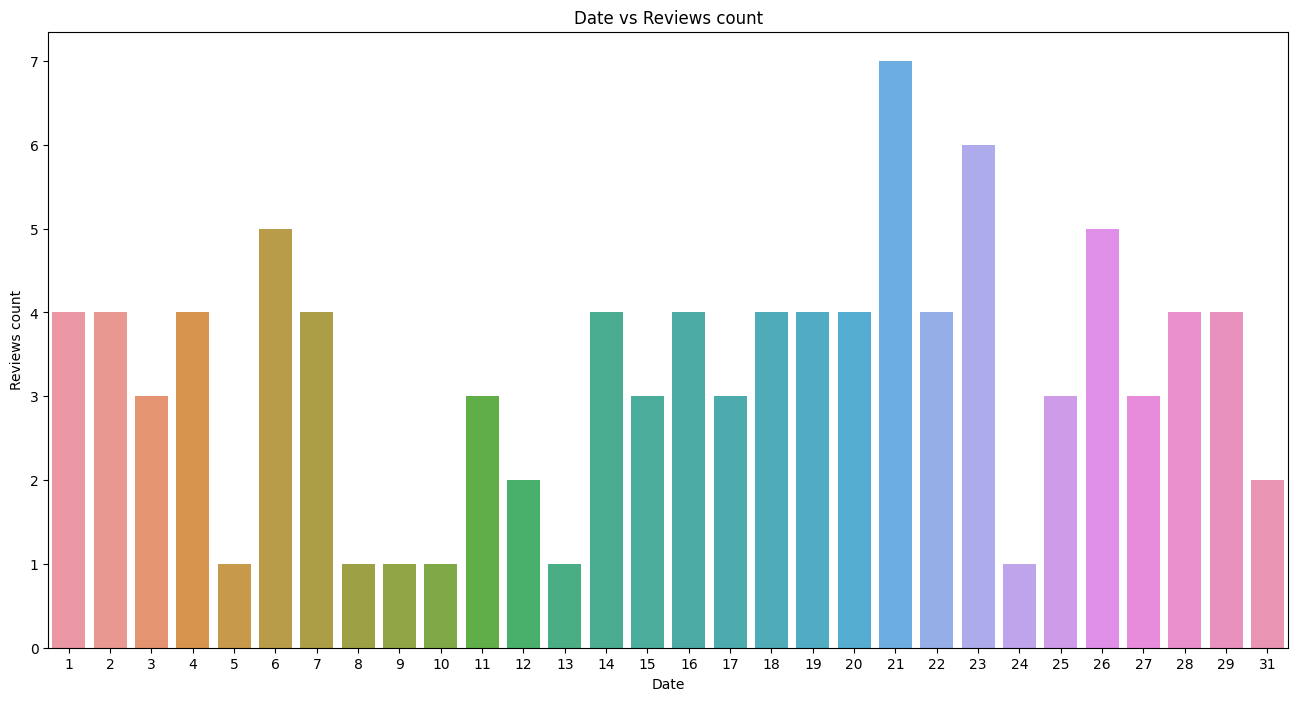

In [28]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

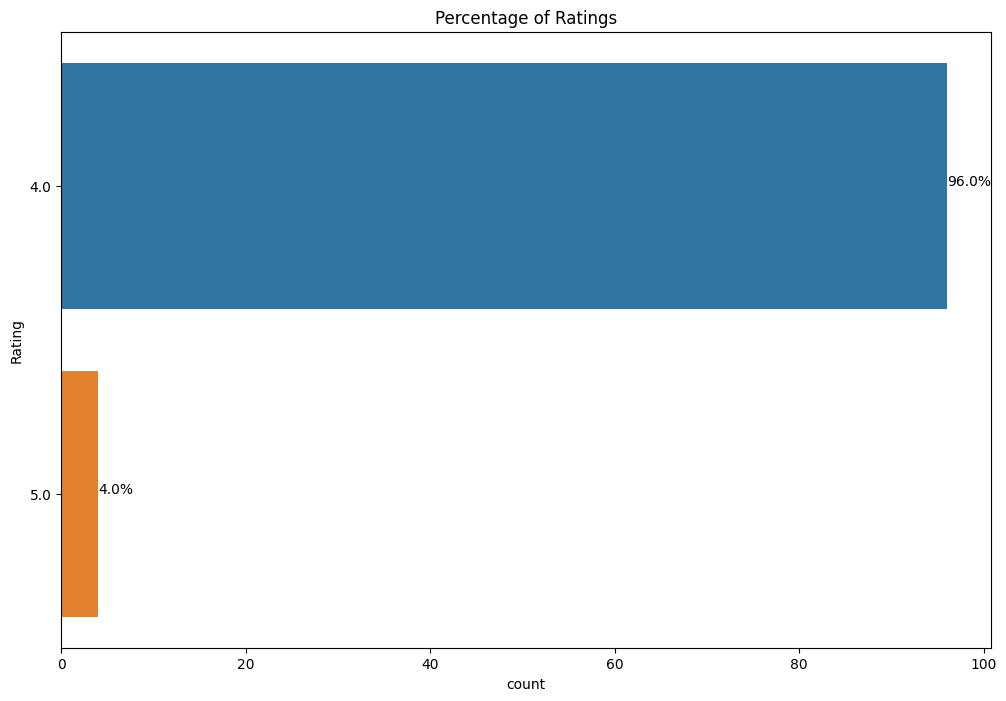

In [29]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

#BasicText Preprocessing</a>
**For Sentiment Analysis</a>**
**keeping the DataFrame intact and each tweets separate from each other**

In [30]:
data = df[['Review']]
data

,Review
0,This is best phone in low budget this type of ...
1,"After using of 6 months, my observation is bat..."
2,It has fine features in respect of money. A bi...
3,Camera is avgPerformance is goodBattery goodIn...
4,I will try to keep this review short. This rev...
...,...
95,Superb quality phone with good display and nic...
96,All products is very good
97,Nothing
98,The phone is very good and its function really...


In [31]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [32]:
data

,Review
0,this best phone low budget type product i neve...
1,"after using 6 months, observation battery cons..."
2,it fine features respect money. a bit camera c...
3,camera avgperformance goodbattery goodinterfac...
4,i try keep review short. this review perspecti...
...,...
95,superb quality phone good display nice battery...
96,all products good
97,nothing
98,the phone good function really good budget


In [33]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [34]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...


#Text Pre-processing Techniques
**Pre-processing 'Key Words'**
**Removing '@names'**

In [35]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [36]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...
5,good segment,Very good in all segments.
6,good,Very good
7,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
8,good,good
9,good phone oneplus smartphone recommended user...,Good Phone.. OnePlus smartphone is recommended...


**Removing links (http | https)**

In [37]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...
5,good segment,Very good in all segments.
6,good,Very good
7,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
8,good,good
9,good phone oneplus smartphone recommended user...,Good Phone.. OnePlus smartphone is recommended...


**Removing Review with empty text**

In [38]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...
5,good segment,Very good in all segments.
6,good,Very good
7,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
8,good,good
9,good phone oneplus smartphone recommended user...,Good Phone.. OnePlus smartphone is recommended...


**Dropping duplicate rows**

In [39]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...
5,good segment,Very good in all segments.
6,good,Very good
7,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
8,good,good
9,good phone oneplus smartphone recommended user...,Good Phone.. OnePlus smartphone is recommended...


#Resetting index
It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [40]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...
5,good segment,Very good in all segments.
6,good,Very good
7,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
8,good,good
9,good phone oneplus smartphone recommended user...,Good Phone.. OnePlus smartphone is recommended...


#Removing Punctuations, Numbers and Special characters
This step should not be followed if we also want to do sentiment analysis on __key phrases__ as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on __key words__.

In [41]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [42]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...
5,good segment,Very good in all segments.
6,good,Very good
7,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
8,good,good
9,good phone oneplus smartphone recommended user...,Good Phone.. OnePlus smartphone is recommended...


**Function to remove emoji**

In [43]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [44]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...
5,good segment,Very good in all segments.
6,good,Very good
7,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
8,good,good
9,good phone oneplus smartphone recommended user...,Good Phone.. OnePlus smartphone is recommended...


In [45]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...,"[best, phone, low, budget, type, product, neve..."
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat...","[using, month, observation, battery, consumpti..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...,"[fine, feature, respect, money, bit, camera, c..."
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...,"[camera, avgperformance, goodbattery, goodinte..."
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...,"[try, keep, review, short, review, perspective..."
5,good segment,Very good in all segments.,"[good, segment]"
6,good,Very good,[good]
7,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,"[purchased, gb, version, phone, come, extendab..."
8,good,good,[good]
9,good phone oneplus smartphone recommended user...,Good Phone.. OnePlus smartphone is recommended...,"[good, phone, oneplus, smartphone, recommended..."


In [46]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

#Removing Stop words
With the same reason we mentioned above, we won't perform this on 'Clean-Review' column, because it needs to be used for __key_phrases__ sentiment analysis.

In [49]:
import codecs
with codecs.open("/content/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [50]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [51]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat..."
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...
5,good segment,Very good in all segments.
6,good,Very good
7,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
8,good,good
9,good phone oneplus smartphone recommended user...,Good Phone.. OnePlus smartphone is recommended...


**Tokenize *'Clean_Reviews**  

In [52]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['using', 'month', 'observation', 'battery', 'consumption', 'much', 'high', 'charge', 'time', 'day', 'deleted', 'apps', 'issue', 'remain'])

In [53]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [best, phone, low, budget, type, product, neve...
1    [using, month, observation, battery, consumpti...
2    [fine, feature, respect, money, bit, camera, c...
3    [camera, avgperformance, goodbattery, goodinte...
4    [try, keep, review, short, review, perspective...
5                                      [good, segment]
6                                               [good]
7    [purchased, gb, version, phone, come, extendab...
8                                               [good]
9    [good, phone, oneplus, smartphone, recommended...
Name: Clean_Reviews, dtype: object

**Converting words to Stemmer**

In [54]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [55]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,best phone low budget type product never seen ...
1,use month observ batteri consumpt much high ch...
2,fine featur respect money bit camera compromis...
3,camera avgperform goodbatteri goodinterfac awesom
4,tri keep review short review perspect averag u...
...,...
94,superb qualiti phone good display nice batteri...
95,product good
96,noth
97,phone good function realli good budget


**Converting words to Lemma**

In [56]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,best phone low budget type product never seen ...
1,using month observation battery consumption mu...
2,fine feature respect money bit camera compromi...
3,camera avgperformance goodbattery goodinterfac...
4,try keep review short review perspective avera...
...,...
94,superb quality phone good display nice battery...
95,product good
96,nothing
97,phone good function really good budget


**CountVectorizer with N-grams (Bigrams & Trigrams)**</a>

In [63]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [64]:
corpus[3]

'camera avgperform goodbatteri goodinterfac awesom'

In [65]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [66]:
X.shape

(99, 2722)

In [68]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

**TF-IDF Vectorizer**</a>

In [70]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [71]:
corpus[4]

'tri keep review short review perspect averag user believ buy phone start use chang adjust without complain much alway better devic price use tool noth much pro camera pretti good con softwar sweet littl featur one plu make sweet neg speed power run app peopl use gener without issu build qualiti good well given go use sort case con con see batteri need charg twice day brows internet use camera time watch youtub instagram facebook medium app like hour two mid bright maximum achiev screen time around hour given high speed charger batteri realli issu tweak around set delet preinstal app stop unnecessari app background easili achiev hr plu screen time peac'

In [72]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [73]:
X.shape

(99, 2722)

In [75]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

**Named Entity Recognition (NER)</a>**

In [77]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'best phone low budget type product never seen best quality camera best using option phone best square work best phone low budget using month observation battery consumption much high charge time day deleted apps issue remain fine feature respect money bit camera compromise good look build running smooth gb gb camera avgperformance goodbattery goodinterface awesome try keep review short review perspective average user believe buy phone start use change adjust without complaining much always better device price use tool nothing much pro camera pretty good con software sweet little feature one plus make sweet negative speed power run apps people use generally without issue build quality good well given going use sort case con con see battery need charge twice day browse internet use camera time watch youtube instagram facebook medium apps like hour two mid brightness maximum achievable screen time around hour given high speed charger battery really issue tweaking around setting delete pr

In [78]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [79]:
for token in doc_block[:50]:
    print(token,token.pos_)

best ADJ
phone NOUN
low ADJ
budget NOUN
type NOUN
product NOUN
never ADV
seen VERB
best ADJ
quality NOUN
camera NOUN
best ADV
using VERB
option NOUN
phone NOUN
best ADJ
square ADJ
work NOUN
best ADJ
phone NOUN
low ADJ
budget NOUN
using VERB
month NOUN
observation NOUN
battery NOUN
consumption NOUN
much ADV
high ADJ
charge NOUN
time NOUN
day NOUN
deleted VERB
apps NOUN
issue NOUN
remain VERB
fine ADJ
feature NOUN
respect NOUN
money NOUN
bit NOUN
camera NOUN
compromise NOUN
good ADJ
look NOUN
build VERB
running VERB
smooth ADJ
gb PROPN
gb PROPN


In [80]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['delete', 'preinstalled', 'apps', 'stop', 'apps', 'background', 'achieve', 'hr', 'screen', 'time', 'peace', 'segment', 'purchased', 'version', 'phone', 'come', 'gb', 'ram', 'memory', 'capability', 'phone', 'category', 'offering', 'point', 'noticed', 'thing', 'confusing', 'placement', 'power', 'button', 'sensor', 'handling', 'phone', 'feel', 'bit', 'finger', 'locking', 'locking', 'phone', 'try', 'handle', 'place', 'pocket', 'problem', 'think', 'point', 'lag', 'bit', 'hoping', 'go', 'update', 'improvement', 'point', 'speaker', 'volume', 'speaker', 'level', 'e', 'volume', 'seem', 'volume', 'limit', 'point', 'camera', 'shoot', 'color', 'photo', 'taken', 'day', 'light', 'skin', 'tone', 'coloured', 'led', 'flash', 'average', 'part', 'phone', 'practicality', 'user', 'brand', 'part', 'pricing', 'offered', 'battery', 'life', 'charging', 'capability', 'moved', 'phone', 'build', 'phone', 'survive', 'fall', 'mishap', 'happening', 'phone', 'feel', 'hand', 'stock']


In [81]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,54
1,camera,26
2,product,22
3,quality,18
4,battery,15
5,price,15
6,use,13
7,budget,8
8,day,8
9,oneplus,8


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

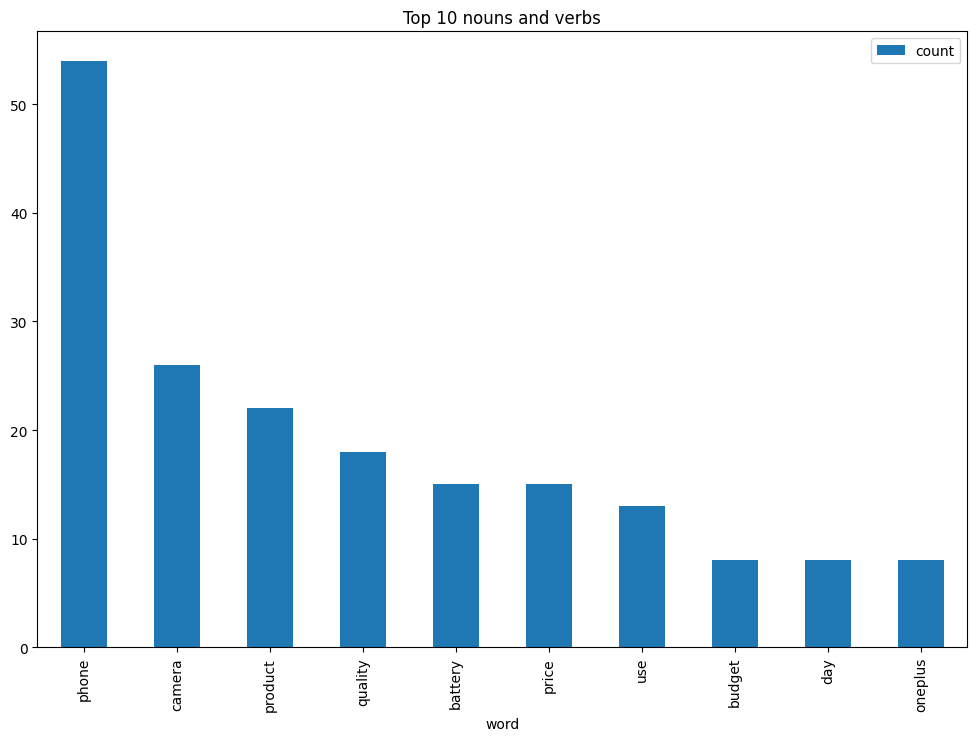

In [82]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

#Feature Extraction</a>

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. __Bag of words (Simple vectorization)__
2. __TF-IDF (Term Frequency - Inverse Document Frequency)__

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.


**Feature Extraction for 'Key Words'</a>**

In [83]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

#Fetch sentiments</a>
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways: <br/>
    __a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)<br/>__
    __b. Using TextBlob<br/>__

In [84]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### <a id='10Aa'>a. Using NLTK's SentimentIntensityAnalyzer</a>

In [85]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,95
neg,4


In [86]:
dataframe.Clean_Reviews[8]

'good'

In [87]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

In [89]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,best phone low budget type product never seen ...,"{'neg': 0.104, 'neu': 0.373, 'pos': 0.522, 'co..."
1,using month observation battery consumption mu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,fine feature respect money bit camera compromi...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp..."
3,camera avgperformance goodbattery goodinterfac...,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp..."
4,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co..."


In [90]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,best phone low budget type product never seen ...,"{'neg': 0.104, 'neu': 0.373, 'pos': 0.522, 'co...",0.9628
1,using month observation battery consumption mu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,fine feature respect money bit camera compromi...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",0.7783
3,camera avgperformance goodbattery goodinterfac...,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...",0.6249
4,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776


In [91]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,best phone low budget type product never seen ...,"{'neg': 0.104, 'neu': 0.373, 'pos': 0.522, 'co...",0.9628,Positive
1,using month observation battery consumption mu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,fine feature respect money bit camera compromi...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",0.7783,Positive
3,camera avgperformance goodbattery goodinterfac...,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...",0.6249,Positive
4,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776,Positive
...,...,...,...,...
94,superb quality phone good display nice battery...,"{'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'comp...",0.9880,Positive
95,product good,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
96,nothing,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
97,phone good function really good budget,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.7003,Positive


In [92]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<Axes: xlabel='sentiment', ylabel='count'>

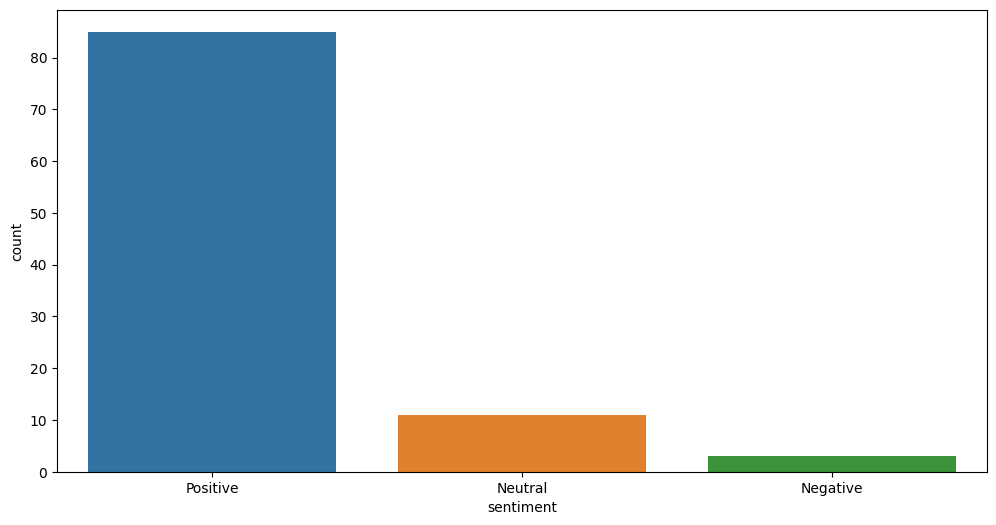

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<ipython-input-95-b3e96d257d7c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

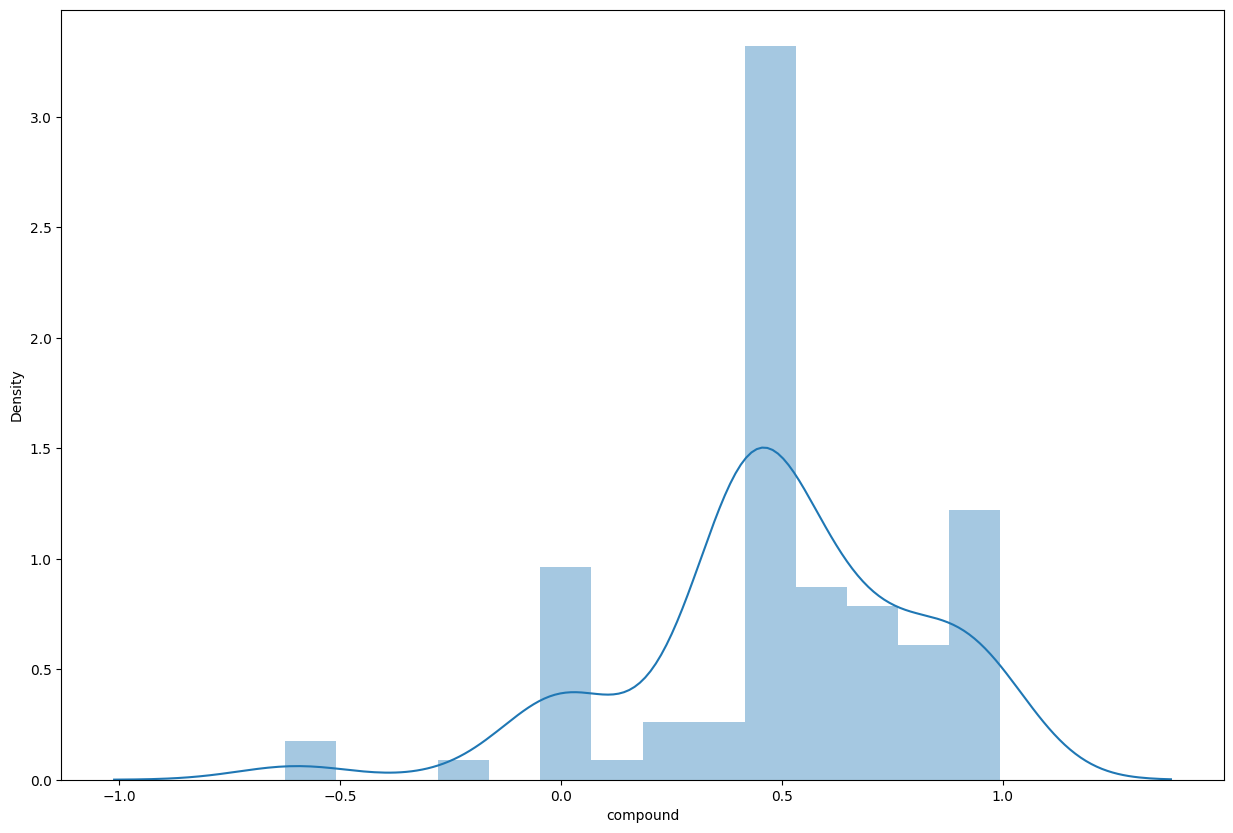

In [95]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

**Using TextBlob</a>**

In [98]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,96
neg,3


In [99]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,best phone low budget type product never seen ...,This is best phone in low budget this type of ...,0.300000,0.714286
1,using month observation battery consumption mu...,"After using of 6 months, my observation is bat...",0.540000,0.160000
2,fine feature respect money bit camera compromi...,It has fine features in respect of money. A bi...,0.533333,0.505556
3,camera avgperformance goodbattery goodinterfac...,Camera is avgPerformance is goodBattery goodIn...,1.000000,1.000000
4,try keep review short review perspective avera...,I will try to keep this review short. This rev...,0.498519,0.169769


Text(0, 0.5, 'Subjectivity')

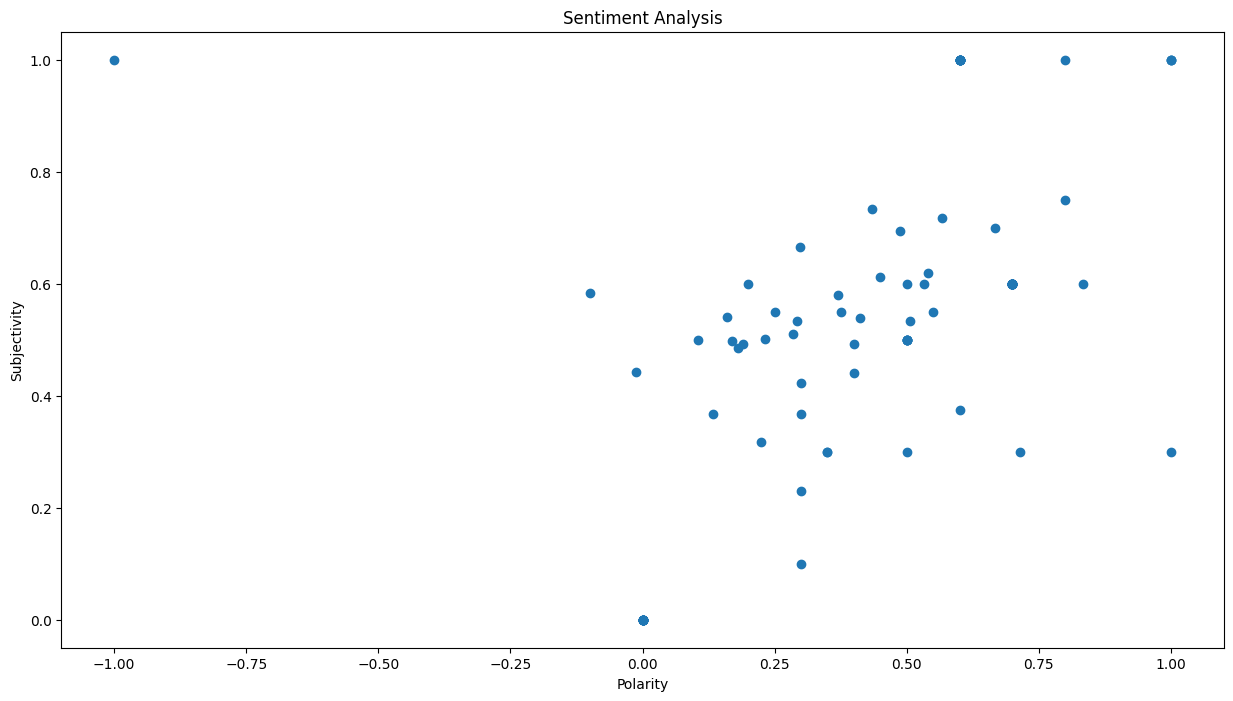

In [100]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [101]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

#Story Generation and Visualization</a>

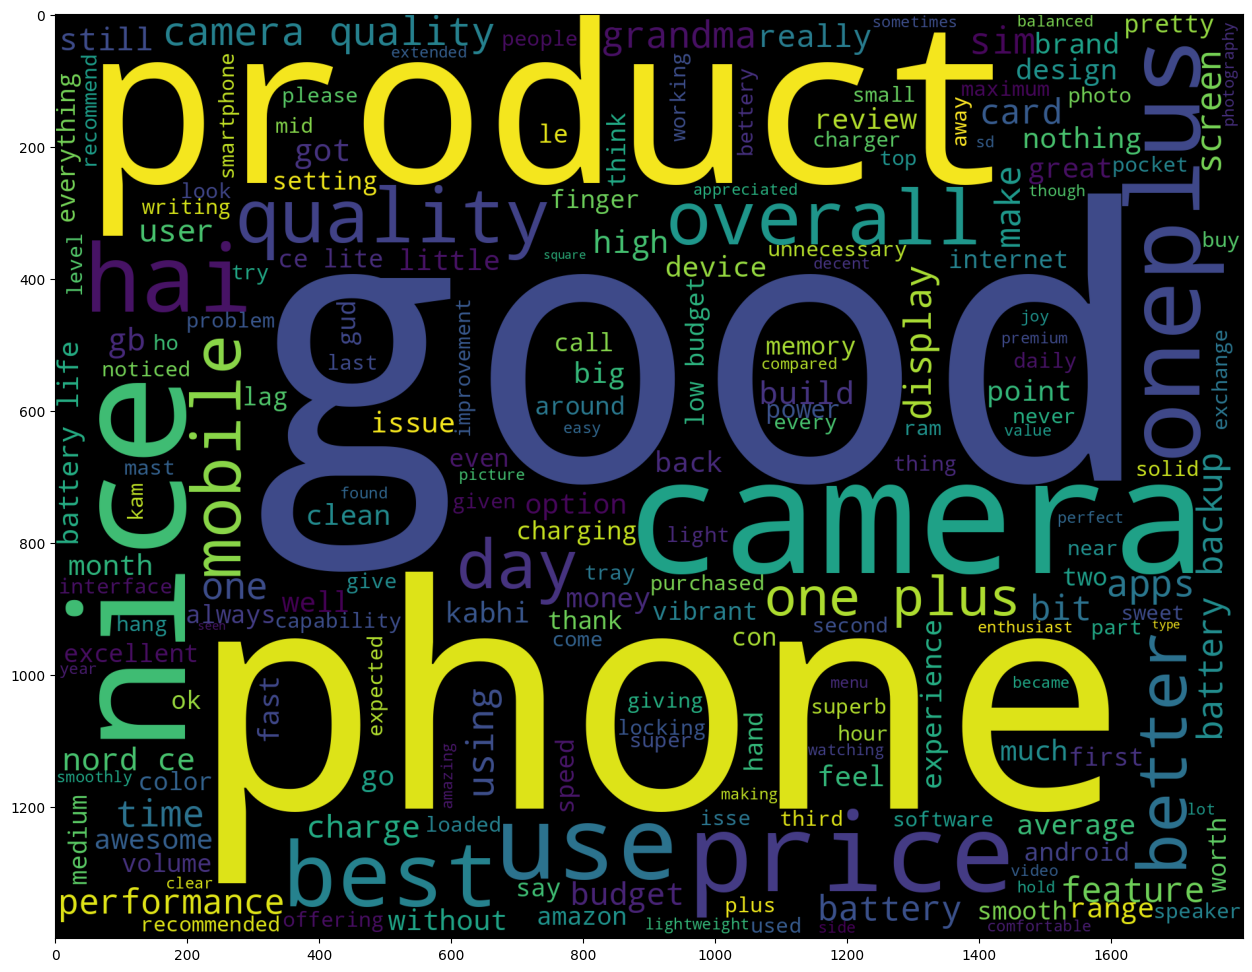

In [103]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

**Most common words in positive Review</a>**
Answer can be best found using WordCloud

In [104]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

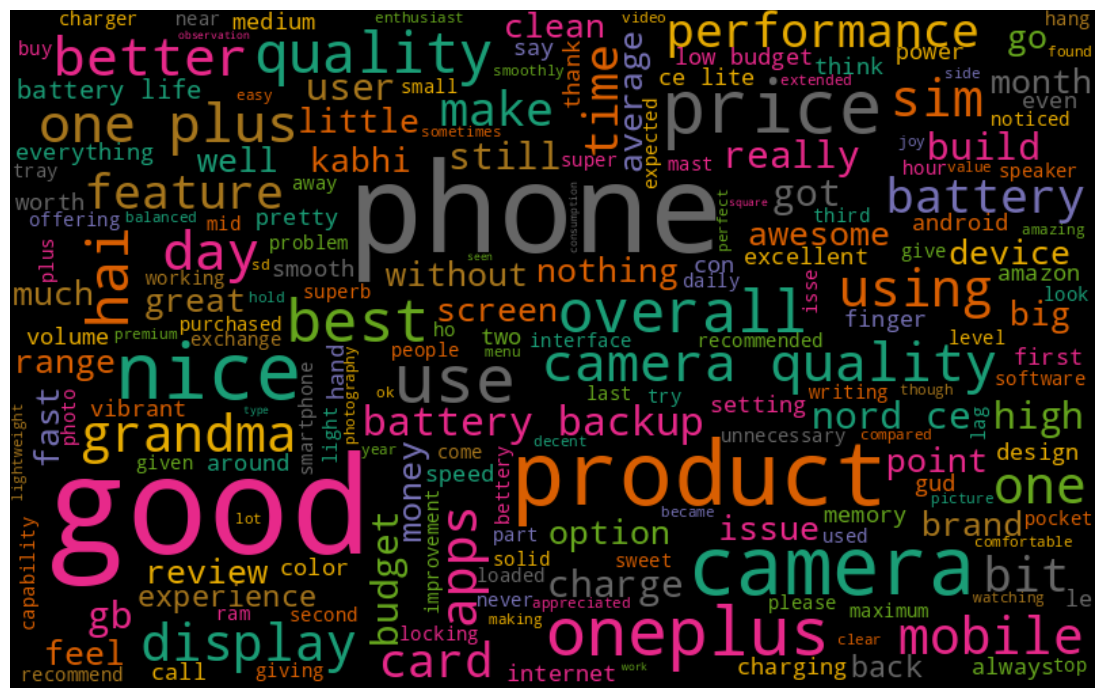

In [105]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

**Most common words in negative Review</a>**

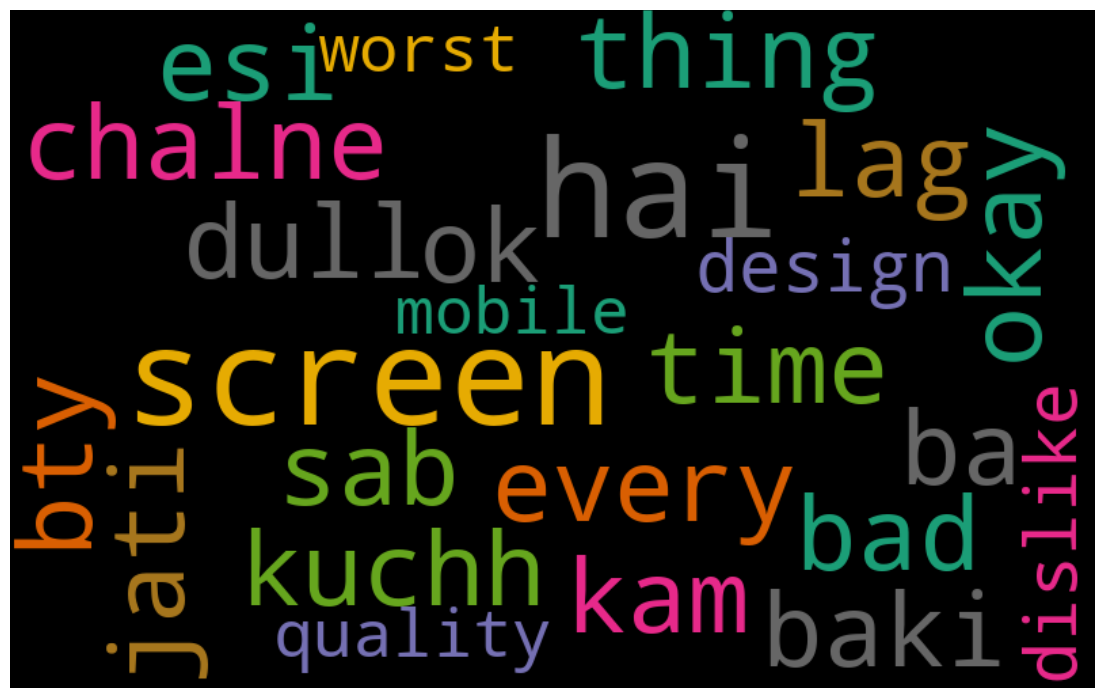

In [106]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)